
<p align="center">
    <img src="https://logowik.com/content/uploads/images/eg-evil-geniuses2488.jpg">


# <center><font color=#1b27a8>Analyzing Evil Geniuses' Social Media Performance</font></center>

##### <center>This notebook analyzes Evil Geniuses' social media analytics from the beginning of January to the end of March 2023, and tries to find patterns in the data to help improve the engagement rate of their posts. Answering five questions throughout this notebook and providing strategies and ideas on how to expand Evil Geniuses' social media presence</center>

## <center>Table of Contents</center>
* [Data Cleaning](#dc)
* [What is the Typical Engagement Rate?](#1)
* [Does Day of the Week or Time Posted Affect Engagement Rate?](#2)
* [Perfomance of Certain Game Titles](#3)
* [What Media Type Performs Best?](#4)
* [What Is Our Best Performing Campaign?](#5)
* [A Posting Strategy](#6)
* [Suggestions For Expansion](#7)

##  <div id='dc'/><center><font color=#ed4588>Data Cleaning</center></font>

##### This part of the notebook tries to correct data and modify data. I will explain the changes I have done to this dataset here, if you do not need to see that, you can skip this part of the notebook.

Just prepping the notebook.

In [712]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar

data = pd.read_csv('/Users/poodle/Data Science Projects/data/social_data.csv')

data

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,03-31-2023 19:55,CSGO,TWITTER,N/A,0,0,Text
1,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
2,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
3,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
4,03-31-2023 19:43,CSGO,TWITTER,Community Engagement,9517,1215,Video
...,...,...,...,...,...,...,...
3474,01-03-2023 10:35,CSGO,TWITTER,N/A,0,0,Link
3475,01-03-2023 10:34,CSGO,TWITTER,N/A,0,0,Link
3476,01-03-2023 10:34,CSGO,TWITTER,N/A,0,0,Link
3477,01-03-2023 10:34,CSGO,TWITTER,N/A,2116,42,Text


The main question that we deal with throughout this notebook deals with engagement rate, which is not a column in this dataset so we must create with total engagements and total impressions. The equation to get the engagement rate is total engagements divided by total impressions.

In [713]:
data['Engagement Rate'] = data['Total Engagements'] / data['Total Impressions']
data

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate
0,03-31-2023 19:55,CSGO,TWITTER,N/A,0,0,Text,NaN
1,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text,NaN
2,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text,NaN
3,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text,NaN
4,03-31-2023 19:43,CSGO,TWITTER,Community Engagement,9517,1215,Video,0.127666
...,...,...,...,...,...,...,...,...
3474,01-03-2023 10:35,CSGO,TWITTER,N/A,0,0,Link,NaN
3475,01-03-2023 10:34,CSGO,TWITTER,N/A,0,0,Link,NaN
3476,01-03-2023 10:34,CSGO,TWITTER,N/A,0,0,Link,NaN
3477,01-03-2023 10:34,CSGO,TWITTER,N/A,2116,42,Text,0.019849


In [714]:
data['Total Impressions'].value_counts()

0        744
894        5
1          4
1377       4
134        4
        ... 
3027       1
18890      1
30645      1
42837      1
2116       1
Name: Total Impressions, Length: 2404, dtype: int64

There are 744 columns with 0 impressions, I find it very difficult to believe that a post from Evil Geniuses will have 0 impressions, so I have decided to remove those rows from the dataset since it will skew the data.

In [715]:
delete = data[data['Total Impressions'] == 0].index
data = data.drop(delete)
data

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate
4,03-31-2023 19:43,CSGO,TWITTER,Community Engagement,9517,1215,Video,0.127666
6,03-31-2023 19:40,CSGO,TWITTER,Community Engagement,1882,83,Photo,0.044102
7,03-31-2023 19:23,CSGO,TWITTER,Community Engagement,17892,3076,Video,0.171920
9,03-31-2023 18:55,CSGO,TWITTER,Community Engagement,13874,1447,Video,0.104296
10,03-31-2023 18:36,General,FBPAGE,Community Engagement,37692,8044,Photo,0.213414
...,...,...,...,...,...,...,...,...
3463,01-04-2023 13:17,General,TWITTER,N/A,393,18,Text,0.045802
3464,01-04-2023 13:00,General,TWITTER,Community Engagement,136660,2371,Photo,0.017350
3465,01-04-2023 13:00,General,FBPAGE,Community Engagement,29051,811,Photo,0.027916
3470,01-03-2023 13:34,General,TWITTER,N/A,7704,153,Text,0.019860


In [716]:
data['Engagement Rate'].describe()

count    2735.000000
mean        0.404926
std        17.975531
min         0.000000
25%         0.014263
50%         0.030864
75%         0.061763
max       940.000000
Name: Engagement Rate, dtype: float64

So here we can see that a post has a 940% engagement rate, which means it has 9.4 times more engagements than impressions. I am going to assume this is also highly improbable so it is safe to remove data that has more than 100% engagement rate.

In [717]:
delete = data[data['Engagement Rate'] > 1].index
print(delete)
data = data.drop(delete)

Int64Index([837, 3216, 3457], dtype='int64')


In [718]:
data['Engagement Rate'].describe()

count    2732.000000
mean        0.053472
std         0.071845
min         0.000000
25%         0.014251
50%         0.030802
75%         0.061606
max         1.000000
Name: Engagement Rate, dtype: float64

Here we also see that there are some posts that have 100% engagement rate, I am also going to remove these rows as well since I believe that it is still highly unlikely for posts to have a 100% engagement rate.

In [719]:
delete = data[data['Engagement Rate'] == 1].index
print(delete)
data = data.drop(delete)

Int64Index([1586], dtype='int64')


In [720]:
data['Engagement Rate'].describe()

count    2731.000000
mean        0.053126
std         0.069537
min         0.000000
25%         0.014249
50%         0.030780
75%         0.061535
max         0.600000
Name: Engagement Rate, dtype: float64

Here I noticed while analyzing some data that there was 'General ' with a space and 'General' without the space. So I needed to change it so that there is only 'General' to do a proper analysis of the data.

In [721]:
data['Account'].value_counts()
data[data['Account'] == 'General ']

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate
10,03-31-2023 18:36,General,FBPAGE,Community Engagement,37692,8044,Photo,0.213414
14,03-31-2023 17:11,General,TWITTER,Community Engagement,5216,113,Text,0.021664
16,03-31-2023 16:50,General,TWITTER,Community Engagement,6498,123,Text,0.018929
17,03-31-2023 16:50,General,TWITTER,Community Engagement,8321,133,Text,0.015984
18,03-31-2023 16:38,General,TWITTER,Community Engagement,953,36,Text,0.037775
...,...,...,...,...,...,...,...,...
3461,01-04-2023 14:57,General,FBPAGE,Community Engagement,155521,19098,Photo,0.122800
3463,01-04-2023 13:17,General,TWITTER,N/A,393,18,Text,0.045802
3464,01-04-2023 13:00,General,TWITTER,Community Engagement,136660,2371,Photo,0.017350
3465,01-04-2023 13:00,General,FBPAGE,Community Engagement,29051,811,Photo,0.027916


In [722]:
data['Account'] = data['Account'].astype(str).str.replace('\s+', '')
data['Account'].value_counts()

/var/folders/10/8djj28nd3zj8g8r9gk5t7dhm0000gn/T/ipykernel_49821/1822387544.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Account'] = data['Account'].astype(str).str.replace('\s+', '')


General            1766
DOTA2               698
CSGO                198
ContentCreators      35
Valorant             34
Name: Account, dtype: int64

In [723]:
data = data.reset_index()

In [724]:
data = data.drop('index', axis=1)
data

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate
0,03-31-2023 19:43,CSGO,TWITTER,Community Engagement,9517,1215,Video,0.127666
1,03-31-2023 19:40,CSGO,TWITTER,Community Engagement,1882,83,Photo,0.044102
2,03-31-2023 19:23,CSGO,TWITTER,Community Engagement,17892,3076,Video,0.171920
3,03-31-2023 18:55,CSGO,TWITTER,Community Engagement,13874,1447,Video,0.104296
4,03-31-2023 18:36,General,FBPAGE,Community Engagement,37692,8044,Photo,0.213414
...,...,...,...,...,...,...,...,...
2726,01-04-2023 13:17,General,TWITTER,N/A,393,18,Text,0.045802
2727,01-04-2023 13:00,General,TWITTER,Community Engagement,136660,2371,Photo,0.017350
2728,01-04-2023 13:00,General,FBPAGE,Community Engagement,29051,811,Photo,0.027916
2729,01-03-2023 13:34,General,TWITTER,N/A,7704,153,Text,0.019860


Here I need to change the Published Date column into a datetime column because it will be easier to extract the hour and day of the week if I do so.

In [725]:
data['Published Date'] = pd.to_datetime(data['Published Date'])
data['Day of the Week'] = data['Published Date'].dt.dayofweek
data['Hour'] = data['Published Date'].dt.hour
data

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate,Day of the Week,Hour
0,2023-03-31 19:43:00,CSGO,TWITTER,Community Engagement,9517,1215,Video,0.127666,4,19
1,2023-03-31 19:40:00,CSGO,TWITTER,Community Engagement,1882,83,Photo,0.044102,4,19
2,2023-03-31 19:23:00,CSGO,TWITTER,Community Engagement,17892,3076,Video,0.171920,4,19
3,2023-03-31 18:55:00,CSGO,TWITTER,Community Engagement,13874,1447,Video,0.104296,4,18
4,2023-03-31 18:36:00,General,FBPAGE,Community Engagement,37692,8044,Photo,0.213414,4,18
...,...,...,...,...,...,...,...,...,...,...
2726,2023-01-04 13:17:00,General,TWITTER,N/A,393,18,Text,0.045802,2,13
2727,2023-01-04 13:00:00,General,TWITTER,Community Engagement,136660,2371,Photo,0.017350,2,13
2728,2023-01-04 13:00:00,General,FBPAGE,Community Engagement,29051,811,Photo,0.027916,2,13
2729,2023-01-03 13:34:00,General,TWITTER,N/A,7704,153,Text,0.019860,1,13


Since the day of the week extracted from the data uses numbers, I thought it would be wise to change it back to the normal names for the days to make it easier to read.

In [726]:
data['Day of the Week'] = data['Day of the Week'].map(
    {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5:'Saturday', 6:'Sunday'}
    )

data

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate,Day of the Week,Hour
0,2023-03-31 19:43:00,CSGO,TWITTER,Community Engagement,9517,1215,Video,0.127666,Friday,19
1,2023-03-31 19:40:00,CSGO,TWITTER,Community Engagement,1882,83,Photo,0.044102,Friday,19
2,2023-03-31 19:23:00,CSGO,TWITTER,Community Engagement,17892,3076,Video,0.171920,Friday,19
3,2023-03-31 18:55:00,CSGO,TWITTER,Community Engagement,13874,1447,Video,0.104296,Friday,18
4,2023-03-31 18:36:00,General,FBPAGE,Community Engagement,37692,8044,Photo,0.213414,Friday,18
...,...,...,...,...,...,...,...,...,...,...
2726,2023-01-04 13:17:00,General,TWITTER,N/A,393,18,Text,0.045802,Wednesday,13
2727,2023-01-04 13:00:00,General,TWITTER,Community Engagement,136660,2371,Photo,0.017350,Wednesday,13
2728,2023-01-04 13:00:00,General,FBPAGE,Community Engagement,29051,811,Photo,0.027916,Wednesday,13
2729,2023-01-03 13:34:00,General,TWITTER,N/A,7704,153,Text,0.019860,Tuesday,13


Just changing the capitilization on the account type column.

In [727]:
data['Account Type'] = data['Account Type'].map(
    {'TWITTER': 'Twitter', 'FBPAGE': 'Facebook', 'INSTAGRAM': 'Instagram', 'TIKTOK_BUSINESS': 'TikTok', 'YOUTUBE': 'YouTube', 'LINKEDIN_COMPANY': 'LinkedIn'}
)

data

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate,Day of the Week,Hour
0,2023-03-31 19:43:00,CSGO,Twitter,Community Engagement,9517,1215,Video,0.127666,Friday,19
1,2023-03-31 19:40:00,CSGO,Twitter,Community Engagement,1882,83,Photo,0.044102,Friday,19
2,2023-03-31 19:23:00,CSGO,Twitter,Community Engagement,17892,3076,Video,0.171920,Friday,19
3,2023-03-31 18:55:00,CSGO,Twitter,Community Engagement,13874,1447,Video,0.104296,Friday,18
4,2023-03-31 18:36:00,General,Facebook,Community Engagement,37692,8044,Photo,0.213414,Friday,18
...,...,...,...,...,...,...,...,...,...,...
2726,2023-01-04 13:17:00,General,Twitter,N/A,393,18,Text,0.045802,Wednesday,13
2727,2023-01-04 13:00:00,General,Twitter,Community Engagement,136660,2371,Photo,0.017350,Wednesday,13
2728,2023-01-04 13:00:00,General,Facebook,Community Engagement,29051,811,Photo,0.027916,Wednesday,13
2729,2023-01-03 13:34:00,General,Twitter,N/A,7704,153,Text,0.019860,Tuesday,13


##  <div id='1'/><center><font color=#ed4588>What is the Typical Engagement Rate?</center></font>


##### The first question that I will answer is "What is the typical engagement rate we can expect? What’s the likelihood that we can achieve a 15% engagement rate?", to quickly find the answer to this question is use the describe function in python to pull up the summary statistics for the engagement rate column.

In [728]:
data['Engagement Rate'].describe()

count    2731.000000
mean        0.053126
std         0.069537
min         0.000000
25%         0.014249
50%         0.030780
75%         0.061535
max         0.600000
Name: Engagement Rate, dtype: float64

Here we can see that the average (mean) engagement rate is 5%, so we can say that we can expect a 5% engagement rate. However, looking at the summary, we can see that there is a max of 60% egnagement rate, this leads me to believe that there may be a potential for a lot of outliers in this dataset, so I think it will be better to use the median (50%) which is the middle value if all the data was ordered sequentially. With that the median of the dataset is 3% which is lower than the 5% from the mean. 

In short, we can expect a post to get an engagement rate of around 3%.

In order to obtain the likelihood of getting a post with 15% engagement rate, we will need to find all the posts with 15% or more engagement rate and divide it by the amount of rows we have in the dataset.

In [729]:
fifteen = data[data['Engagement Rate'] >= .15]
print('Percentage of posts with 15% engagement rate or more: ',fifteen.shape[0] / data.shape[0])

Percentage of posts with 15% engagement rate or more:  0.08128890516294397


With an 8% probablity of a post getting 15% engagement rate or more, it seems highly unlikely to expect posts to reach that level of engagement even with adjustments to our strategy.

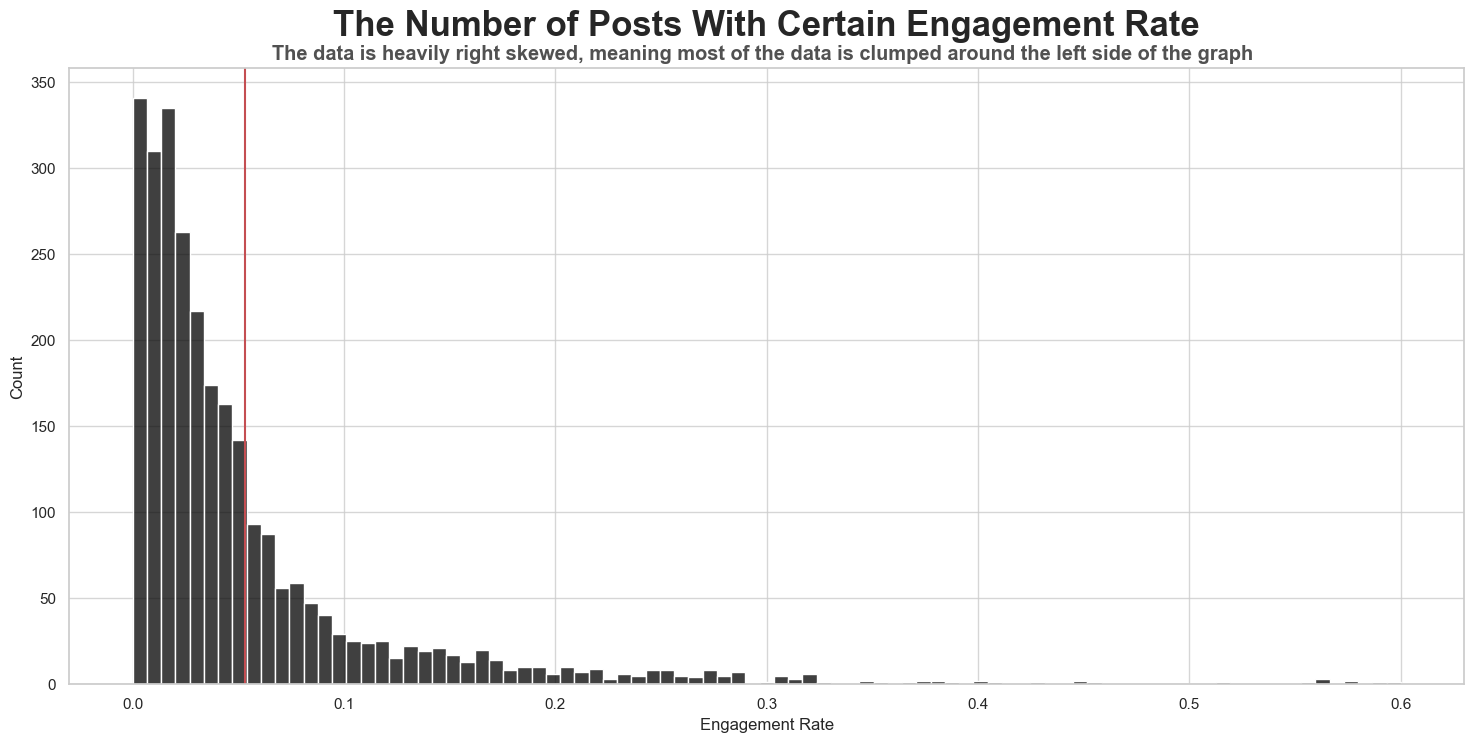

In [730]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(18,8))
sns.histplot(data['Engagement Rate'], color='black')
plt.title('The Number of Posts With Certain Engagement Rate', y=1.04)
plt.suptitle('The data is heavily right skewed, meaning most of the data is clumped around the left side of the graph', x=.51, y=.91, weight='bold', alpha=.8)
plt.axvline(x=.053126, color='r')

Through this graph, we can see more clearly that a majority of the posts have less than a 10% engagement rate, in fact the red line notes that all the data on the left side of the graph is 50% of all the data in the dataset. Showing how how little posts have less than 15% engagement rate.

While the visualization works, to answer future questions, I will need to use a visualization known as the boxplot to do proper analysis and get the right conclusions. The picture below explains what the boxplot shows.

<p align="center">
    <img src="https://cdn1.byjus.com/wp-content/uploads/2020/10/Box-Plot-and-Whisker-Plot-1.png">


Text(0.5, 0.98, 'Most of the Data Shows Less Than 15 Percent Engagement Rate')

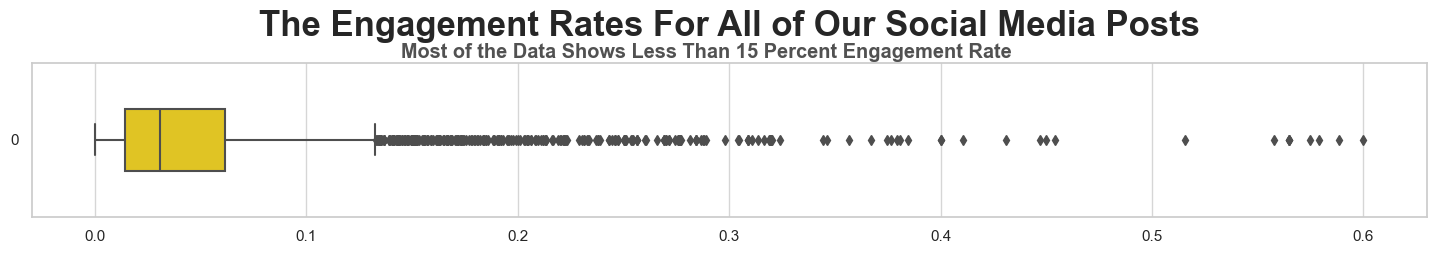

In [731]:
fig, ax = plt.subplots(figsize=(18,2))
sns.boxplot(data['Engagement Rate'], orient='h', color='#ffda05', width=.4)
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titleweight'] = 'bold'
plt.title('The Engagement Rates For All of Our Social Media Posts', y=1.12)
plt.suptitle('Most of the Data Shows Less Than 15 Percent Engagement Rate', weight='bold', alpha=.8)

Here is how the boxplot would visualize the same data as the previous visualization. The most important part to focus on the boxplots is the median, which is the middle line of the colored box. I will use the median to derive my conclusions of the dataset.

##  <div id='2'/><center><font color=#ed4588>Does Day of the Week or Time Posted Affect Engagement Rate?</center></font>

##### This is a two part question, so first I will answer the question if the day of the week has an effect on the engagement rate, and then answer if the hour has an effect on the engagement rate as well.

Text(0.51, 0.9, 'Certain days show an improvement to the median of all posts')

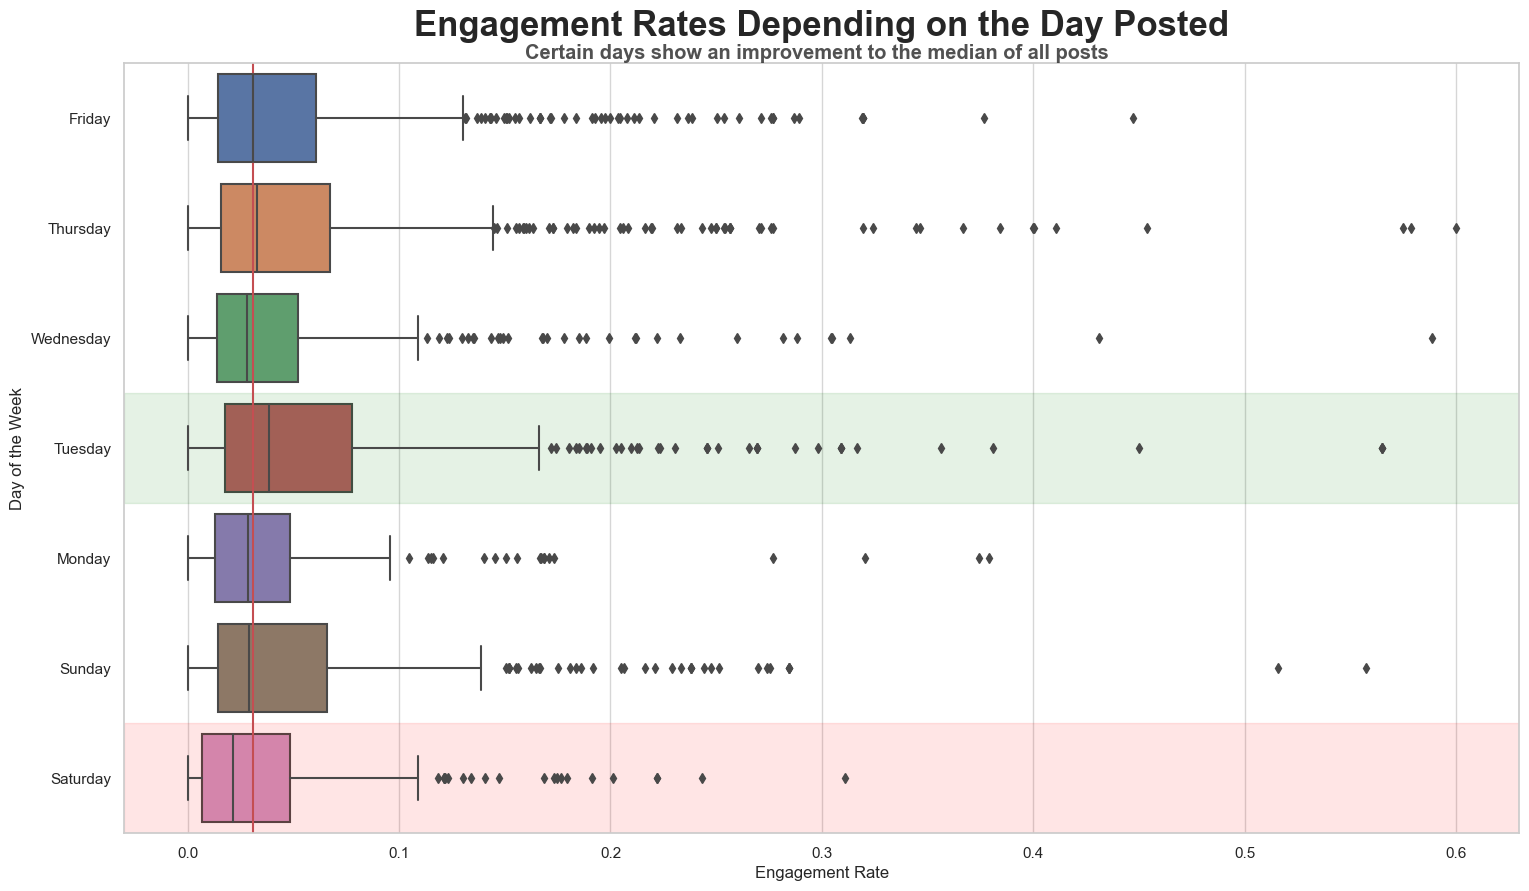

In [732]:
fig, ax = plt.subplots(figsize=(18, 10))
sns.set_style('whitegrid')
sns.boxplot(x=data['Engagement Rate'], y=data['Day of the Week'], orient='h')
plt.axvline(x=.03078, color='r', linestyle='-')
ax.axhspan(ymin=2.5, ymax=3.5, xmin=0, alpha=.1, color='green')
ax.axhspan(ymin=5.5, ymax=6.5, xmin=0, alpha=.1, color='red')
plt.title('Engagement Rates Depending on the Day Posted', y=1.025)
plt.suptitle('Certain days show an improvement to the median of all posts', x=.51, y=.90, weight='bold', alpha=.8)

With the red line noting the median of the whole dataset, we can see that there is a little bit of variance between the days regarding engagement rate. Most of these days sadly, I would say that the difference is so slight, that we can not create a posting strategy around those days. 

However, we do see two days that do deviate from the median enough for us to make some conclusions.

Tuesday shows a decent increase from the median, so we can conclude that on average, we can expect better perfomance on our posts on Tuesday.

On the contrary, we see Saturday has a decrease from the median, so we can expect for posts to do worse on Saturday on average.

------------------------------------------------------------------------------------------------------------------

Next we need to see if the hour posted has an effect on the engagement rate as well.

Text(0.5, 1.0, 'Engagement Rate Depending on the Hour Posted')

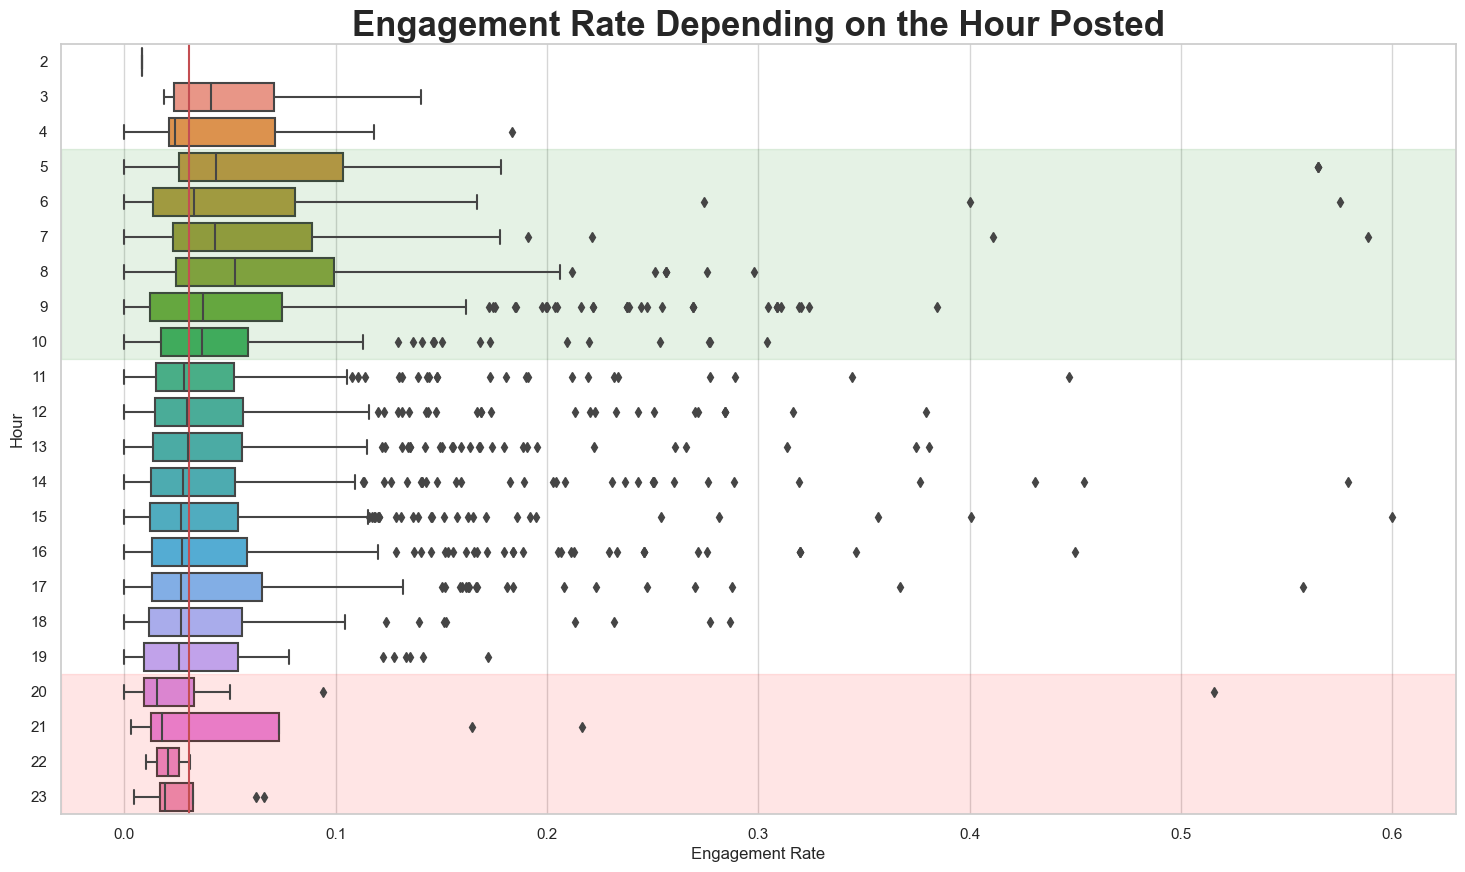

In [733]:
fig, ax = plt.subplots(figsize=(18,10))
sns.set_style('whitegrid')
sns.boxplot(x=data['Engagement Rate'], y=data['Hour'], orient='h')
ax.axhspan(ymin=2.5, ymax=8.5, xmin=0, alpha=.1, color='green')
ax.axhspan(ymin=17.5, ymax=21.5, xmin=0, alpha=.1, color='red')
plt.axvline(x=.03078, color='r', linestyle='-')
plt.title('Engagement Rate Depending on the Hour Posted')

As we can see from the graph there is an effect on the engagement rate depending on the hour posted. If it post was published between 5 AM to 10 AM, we can expect an increase in engagement rate, while anything after 10 we can start expecting a decrease from the median.

##  <div id='3'/><center><font color=#ed4588>Perfomance of Certain Game Titles</center></font>

##### The third question we wiill try to answer is "How are our game titles doing in terms of social performance? Is there a specific game we should focus more on or less?" We will have to answer the first question in order to try to answer the second question.

In [734]:
game_data = data[(data['Account'] != 'General') & (data['Account'] != 'ContentCreators')]

Text(0.5, 1.0, 'Engagement Rate Depending On The Game It Was About')

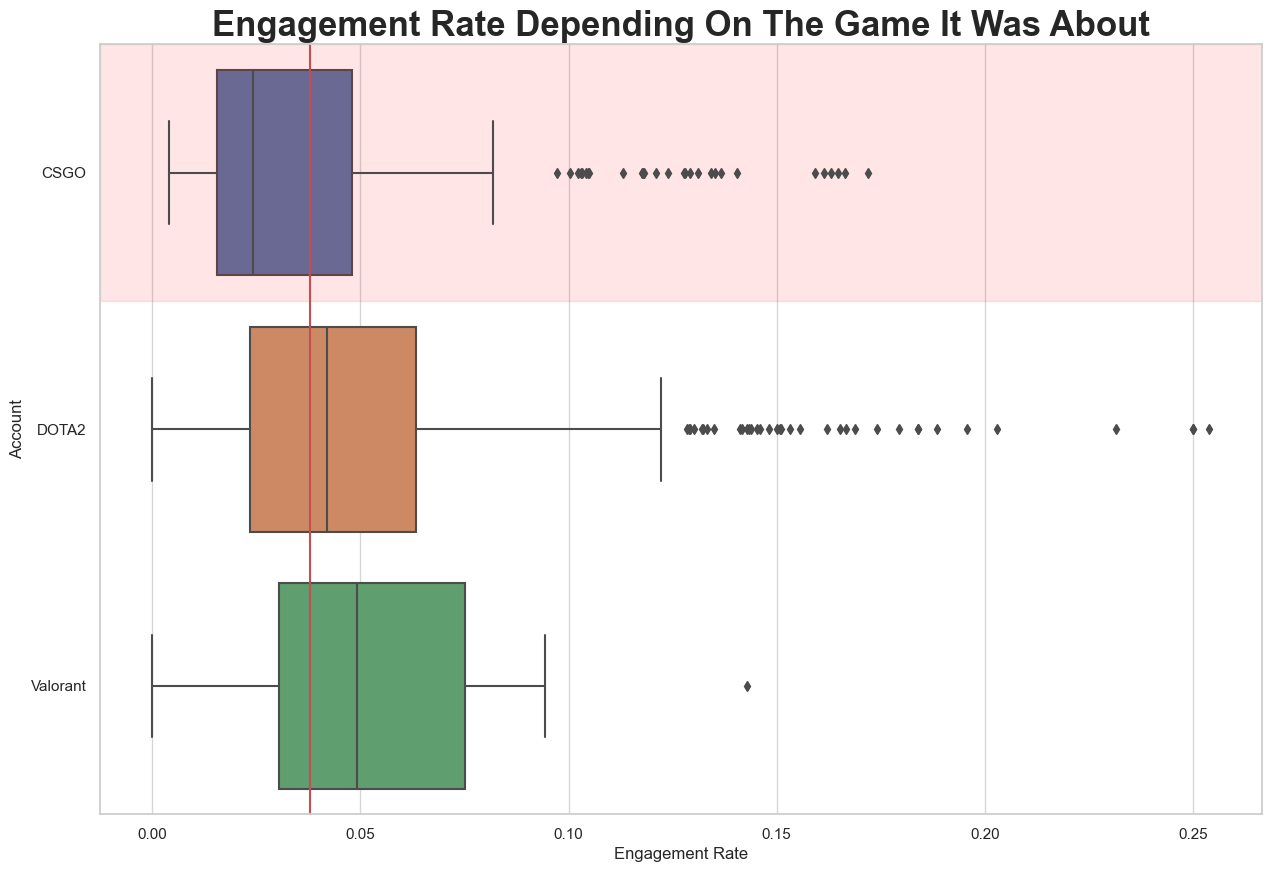

In [735]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x=game_data['Engagement Rate'], y=game_data['Account'], orient='h')
plt.axvline(x=.03780, color='r', linestyle='-')
ax.axhspan(ymin=-.5, ymax=.5, xmin=0, alpha=.1, color='red')
plt.title('Engagement Rate Depending On The Game It Was About')

From this we can see that Valorant is doing the best out of the three. DOTA2 is doing the better than the median, while CSGO is lagging quite far behind not just from the two other games, but also from the median.

One thing I wanted to make sure because it seems as if Valorant doesn't have many outliers is see how many posts each game has respectively to see if there is a reason for the lack of outliers.

In [736]:
game_data['Account'].value_counts()

DOTA2       698
CSGO        198
Valorant     34
Name: Account, dtype: int64

Text(-0.055, 699, '698')

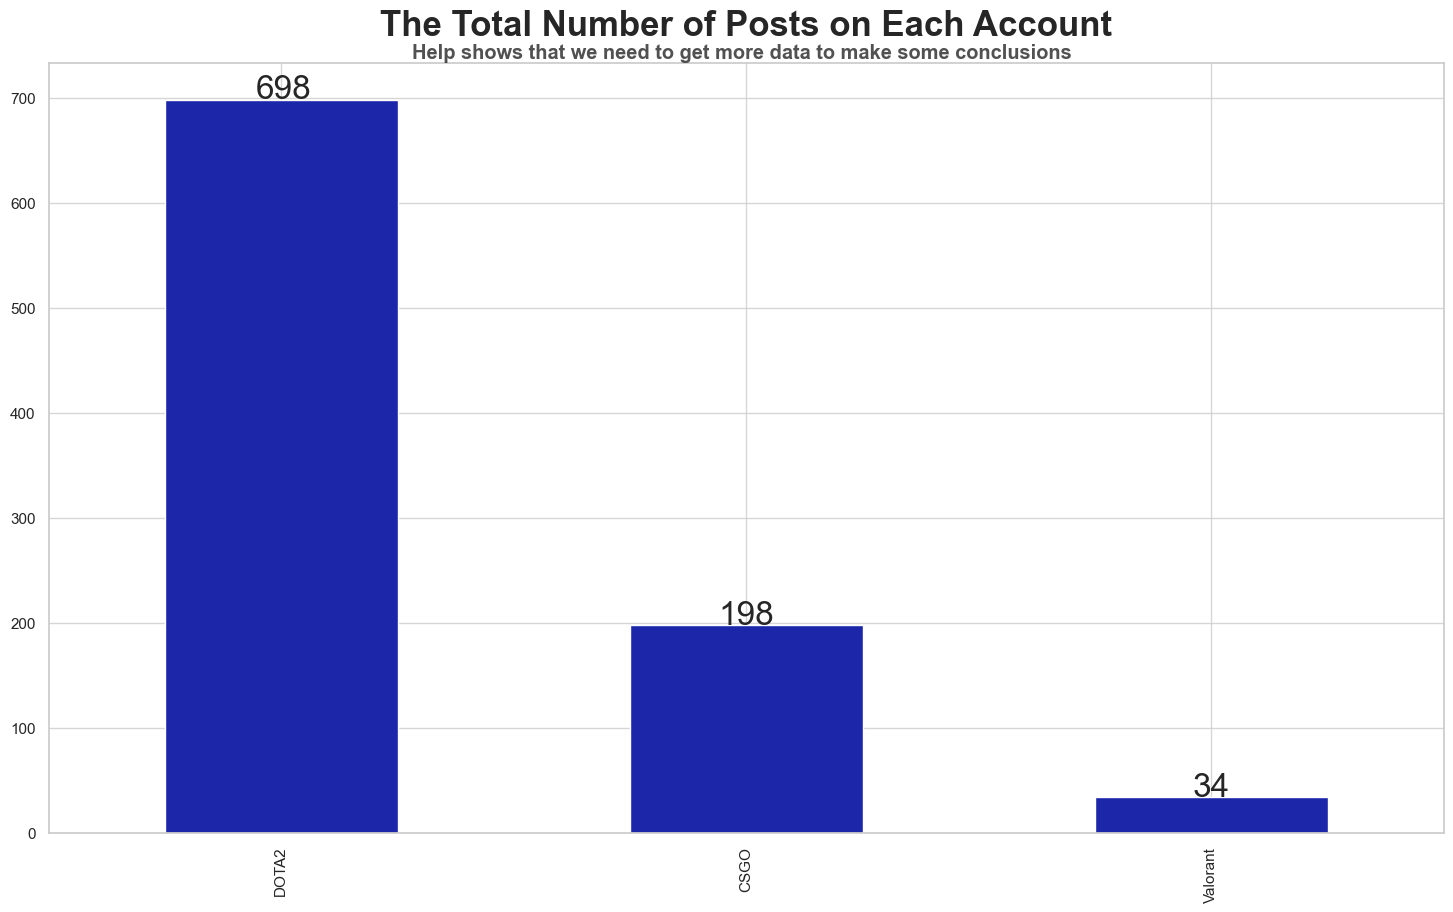

In [737]:
fig, ax = plt.subplots(figsize=(18,10))
game_data.Account.value_counts().plot(kind='bar', color='#1b27a8')
plt.title('The Total Number of Posts on Each Account', y=1.025)
plt.suptitle('Help shows that we need to get more data to make some conclusions', x=.51, y=.9, weight='bold', alpha=.8)
ax.text(1.96, 35, '34', fontsize=24)
ax.text(.94, 199, '198', fontsize=24)
ax.text(-.055, 699, '698', fontsize=24)

So this shows a possible issue with the data, since Valorant only has a total of 34 posts, it might be insufficient to make any huge claims. However this does bring interesting possibilities moving forward.

I would recommend to put more focus onto Valorant since it seems to be doing so well already.

Also, since CSGO is by far our worst performing game on social media, we can decide to slow down the posts around that game for right now.

##  <div id='4'/><center><font color=#ed4588>What Media Type Performs Best?</center></font>

##### Here we are going to try to figure out which media type does better in terms of engagement rate.

Text(0.5, 1.0, 'Engagement Rate Depending on the Media Type')

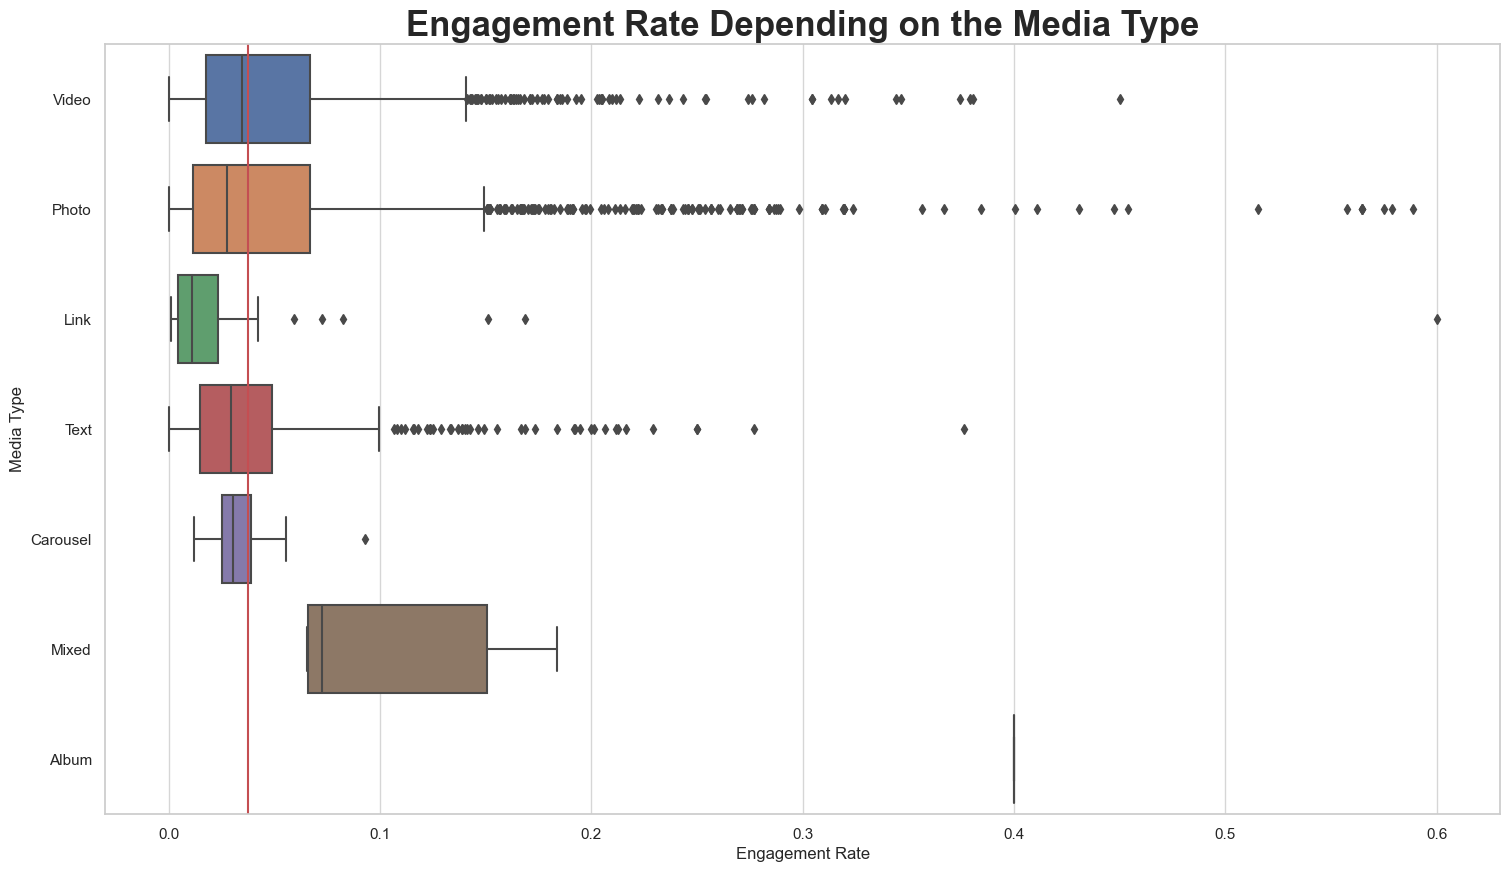

In [738]:
fig, ax = plt.subplots(figsize=(18,10))
sns.boxplot(x=data['Engagement Rate'], y=data['Media Type'], orient='h')
plt.axvline(x=.03780, color='r', linestyle='-')
plt.title('Engagement Rate Depending on the Media Type')

Here we can see that a lot of different media types actually do worse than the dataset median, but we see that mixed does significantly better than the median. Also we see album does amazingly better, but also is just a straight line. I think we should look how many posts each media type has just like we did for the previous question.

In [739]:
data['Media Type'].value_counts()

Photo       1241
Video        886
Text         548
Link          41
Carousel       9
Mixed          5
Album          1
Name: Media Type, dtype: int64

Text(-0.18, 1242, '1241')

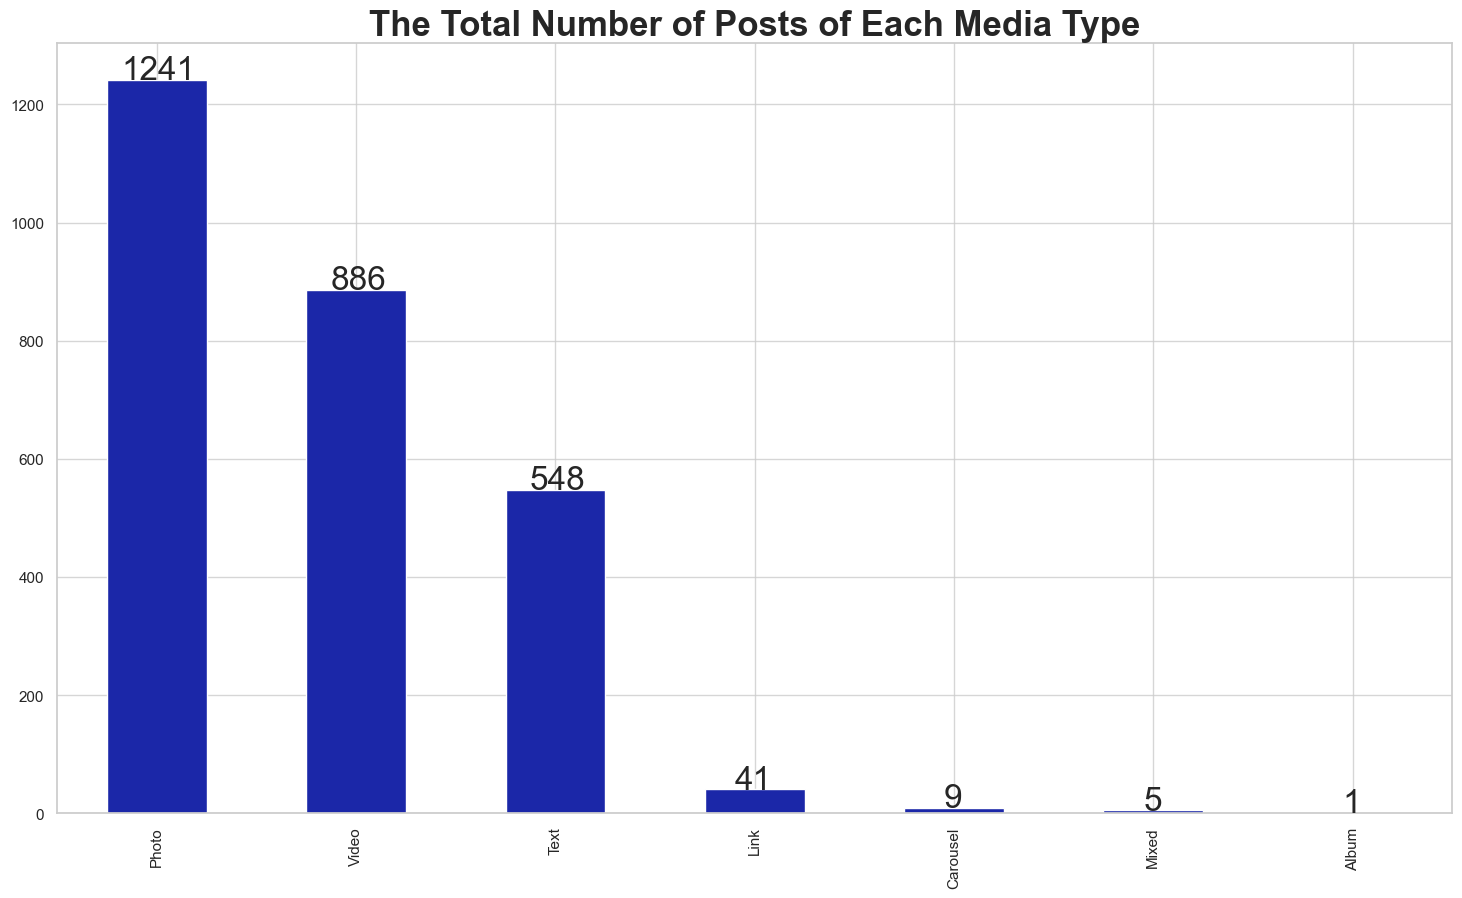

In [740]:
fig, ax = plt.subplots(figsize=(18,10))
data['Media Type'].value_counts().plot(kind='bar', color='#1b27a8')
plt.title('The Total Number of Posts of Each Media Type')
ax.text(5.95, 2, '1', fontsize=24)
ax.text(4.95, 6, '5', fontsize=24)
ax.text(3.95, 10, '9', fontsize=24)
ax.text(2.9, 42, '41', fontsize=24)
ax.text(1.87, 549, '548', fontsize=24)
ax.text(.87, 887, '886', fontsize=24)
ax.text(-.18, 1242, '1241', fontsize=24)

As we can see here, the media types carousel, mixed, and album have such little posts that the data for those media types is unreliable. So we should exclude those media types as to not make the wrong conclusion.

Besides the three we excluded, video is by far our best media type.

##  <div id='5'/><center><font color=#ed4588>What Is Our Best Performing Campaign?</center></font>

Text(0.5, 1.0, 'Engagement Rate Depending on Campaign')

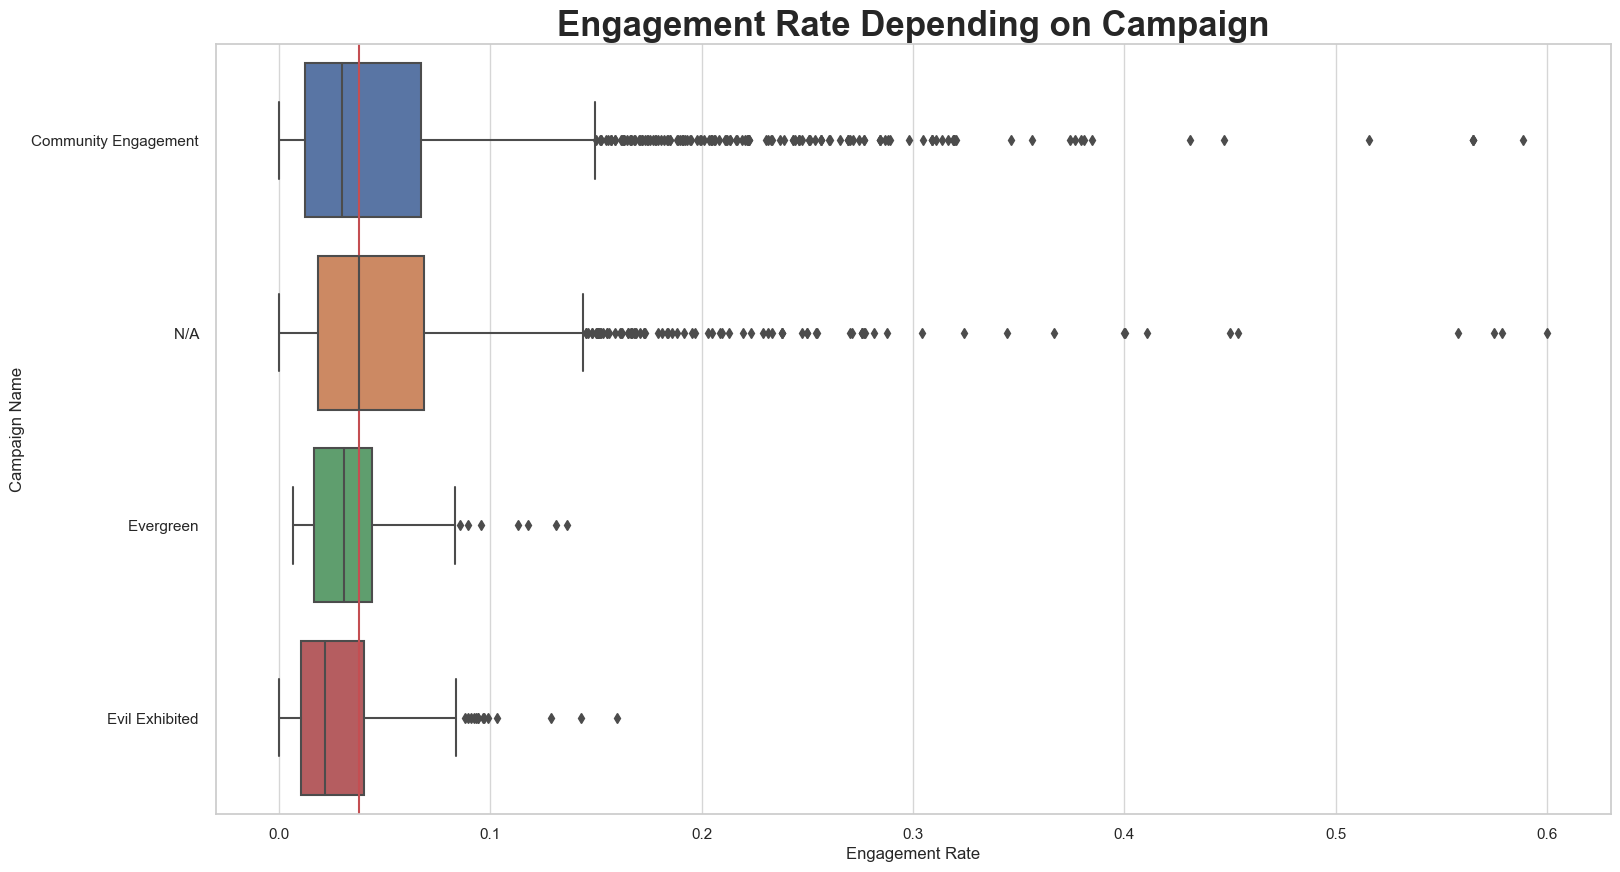

In [741]:
fig, ax = plt.subplots(figsize=(18,10))
sns.boxplot(x=data['Engagement Rate'], y=data['Campaign Name'], orient='h')
plt.axvline(x=.03780, color='r', linestyle='-')
plt.title('Engagement Rate Depending on Campaign')

From this graph we can see that the Evergreen campaign seems to be our best performing campaign, however the amount of outliers would actually push the average of community engagement way higher, so I would say that the Community Egagement campaign was better overall.

But that still does not mean it was the best move, since not having a campaign performed better overall than all other campaigns. 

##  <div id='6'/><center><font color=#ed4588>A Posting Strategy</center></font>

A general posting strategy would first have the team try to post more around the morning time (5 AM - 10 AM), since that is when we end up getting the most engagement on our posts.

Then if we have a post that we know will do well and want to try to maximize our engagement, we should try to post it on Tuesday morning, since that combo is the best performing combination.

We should decrease our use of links, while there is already a low amount of posts with links, that is still by far our lowest performing media type. 

We should maybe also try to use more videos in our posts since that is the best performing media type.

We should continue to post about DOTA2 since that seems to do well consistently.

Try to limit posts about CSGO for a couple months since those posts have not been doing well.

Finally, I would recommend to try posting more about Valorant because from, albeit limited, data it seems to be doing well. It also helps that it is the most popular pc game currently.

##  <div id='7'/><center><font color=#ed4588>Suggestions For Expansion</center></font>

Text(0.51, 0.9, 'We can see Facebook being by far the best social media with engagement')

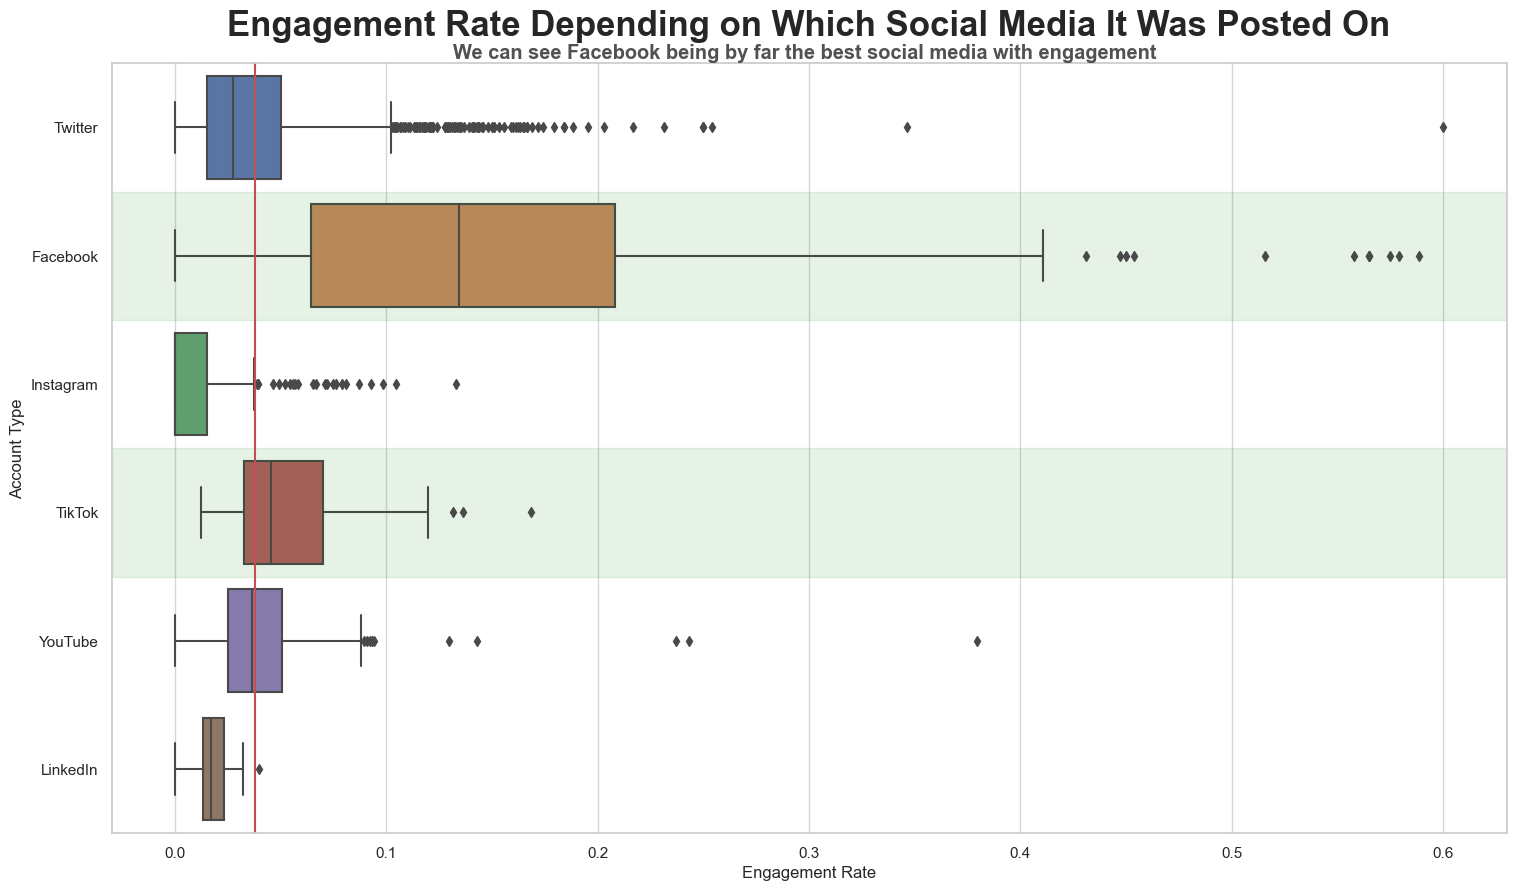

In [742]:
fig, ax = plt.subplots(figsize=(18,10))
sns.boxplot(x=data['Engagement Rate'], y=data['Account Type'], orient='h')
plt.axvline(x=.03780, color='r', linestyle='-')
ax.axhspan(ymin=2.5, ymax=3.5, xmin=0, alpha=.1, color='green')
ax.axhspan(ymin=.5, ymax=1.5, xmin=0, alpha=.1, color='green')
plt.title('Engagement Rate Depending on Which Social Media It Was Posted On', y=1.025)
plt.suptitle('We can see Facebook being by far the best social media with engagement', x=.51, y=.90, weight='bold', alpha=.8)

In [743]:
valorant = data[data['Account'] == 'Valorant']

valorant['Account Type'].value_counts()

YouTube    34
Name: Account Type, dtype: int64

In [744]:
csgo = data[data['Account'] == 'CSGO']

csgo['Account Type'].value_counts()

Twitter    198
Name: Account Type, dtype: int64

With this graph, we can see that Facebook and TikTok do better than the median while the other platforms tend to do worse. I would recommend that we actually start putting Valorant on both TikTok and Facebook and see how that works especially since all of the Valorant posts have been posted only on YouTube so far and have been succeeding. 

I would also recommend that we move some of the CSGO posts onto Facebook and see if it still underperforms over there, since all of the CSGO posts have been on Twitter.

In [745]:
data.to_csv(r'/Users/poodle/Data Science Projects/data/modified_data.csv', index=False, header=True)